In [ ]:
#REF: https://www.analyticsvidhya.com/blog/2022/03/keyword-extraction-methods-from-documents-in-nlp/

In [1]:
from rake_nltk import Rake
import nltk
nltk.download('stopwords')
nltk.download('punkt')

r = Rake()



['reflect partial', 'capturing partial', 'perfect match', 'machine learning', 'keyword extractors', 'f1 score', 'extracted segment', 'correct prediction', 'standard metrics', 'metrics capable']


[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/sangdo/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /Users/sangdo/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [2]:
def read_entire_file(filename):
  with open(filename, 'r') as file:
    content = file.read()
    return content

In [3]:
file_path = 'sudan_1.txt'
text_content = read_entire_file(file_path)

In [5]:
r.extract_keywords_from_text(text_content)
keywordList           = []
rankedList            = r.get_ranked_phrases_with_scores()
for keyword in rankedList:
  keyword_updated       = keyword[1].split()
  keyword_updated_string    = " ".join(keyword_updated[:2])
  keywordList.append(keyword_updated_string)
  if(len(keywordList)>20):
    break
print(keywordList)

['move irregularly', 'supporting saudi', 'also faded', 'current pact', 'potentially even', 'darién gap', 'saudi arabian', 'migration takes', 'recommending five', 'saudi arabian', 'even greater', 'comparative element', 'european union', 'actual migration', 'two million', 'european union', 'ethiopian government', 'also climate', 'forced displacement', 'asylum pact', 'create safe']


In [ ]:
#MUST run /Users/sangdo/Library/Python/3.9/bin/spacy download en_core_web_sm

In [9]:
import spacy
from collections import Counter
from string import punctuation
nlp = spacy.load("en_core_web_sm")
def get_hotwords(text):
    result = []
    pos_tag = ['PROPN', 'ADJ', 'NOUN'] 
    doc = nlp(text.lower()) 
    for token in doc:
        if(token.text in nlp.Defaults.stop_words or token.text in punctuation):
            continue
        if(token.pos_ in pos_tag):
            result.append(token.text)
    return result



output = set(get_hotwords(text_content))
most_common_list = Counter(output).most_common(20)
for item in most_common_list:
  print(item[0])

regions
attention
small
gaza
bigger
portrayal
populations
piece
regard
harmonise
situation
statement
issues
documentation
topic
root
civilians
cop28
general
employers


In [13]:
import pytextrank


/Users/sangdo/Library/Python/3.9/lib/python/site-packages


In [16]:
def extract_textrank(text):
    nlp = spacy.load("en_core_web_sm")
    # add PyTextRank to the spaCy pipeline
    nlp.add_pipe("textrank")
    doc = nlp(text)
    # examine the top-ranked phrases in the document
    for phrase in doc._.phrases[:20]:
        print(phrase.text)

In [17]:
extract_textrank(text_content)

climate migration
migration policies
irregular migration
Migration
migration
regular migration
harmful migration policies
most migration
migration governance
harmonise migration
irregular migration journeys
Most migration
safe migration pathways
other major migration
labour migration pathways
good migration governance
actual migration dynamics
Many people
people
EU countries


In [18]:
import collections
import numpy as np
import pandas as pd
import matplotlib.cm as cm
import matplotlib.pyplot as plt
from matplotlib import rcParams
from wordcloud import WordCloud, STOPWORDS

In [21]:
def word_count_1(text):
    stopwords = STOPWORDS
    wordcloud = WordCloud(stopwords=stopwords, background_color="white", max_words=1000).generate(text)
    rcParams['figure.figsize'] = 10, 20
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.show()
    filtered_words = [word for word in text.split() if word not in stopwords]
    counted_words = collections.Counter(filtered_words)
    words = []
    counts = []
    for letter, count in counted_words.most_common(10):
        words.append(letter)
        counts.append(count)
    colors = cm.rainbow(np.linspace(0, 1, 10))
    rcParams['figure.figsize'] = 20, 10
    plt.title('Top words in the headlines vs their count')
    plt.xlabel('Count')
    plt.ylabel('Words')
    plt.barh(words, counts, color=colors)
    plt.show()

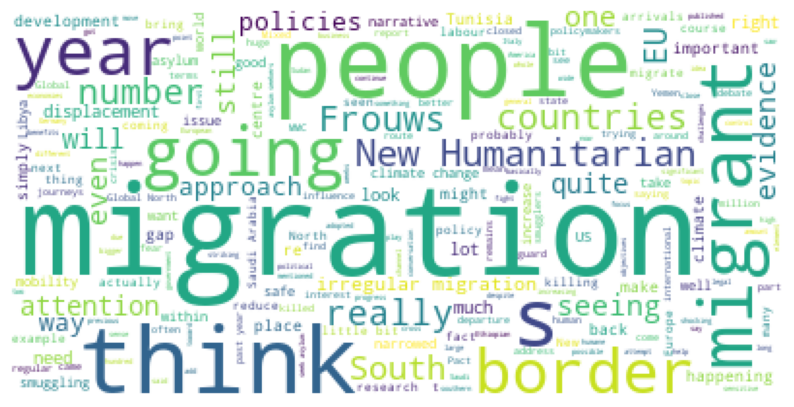

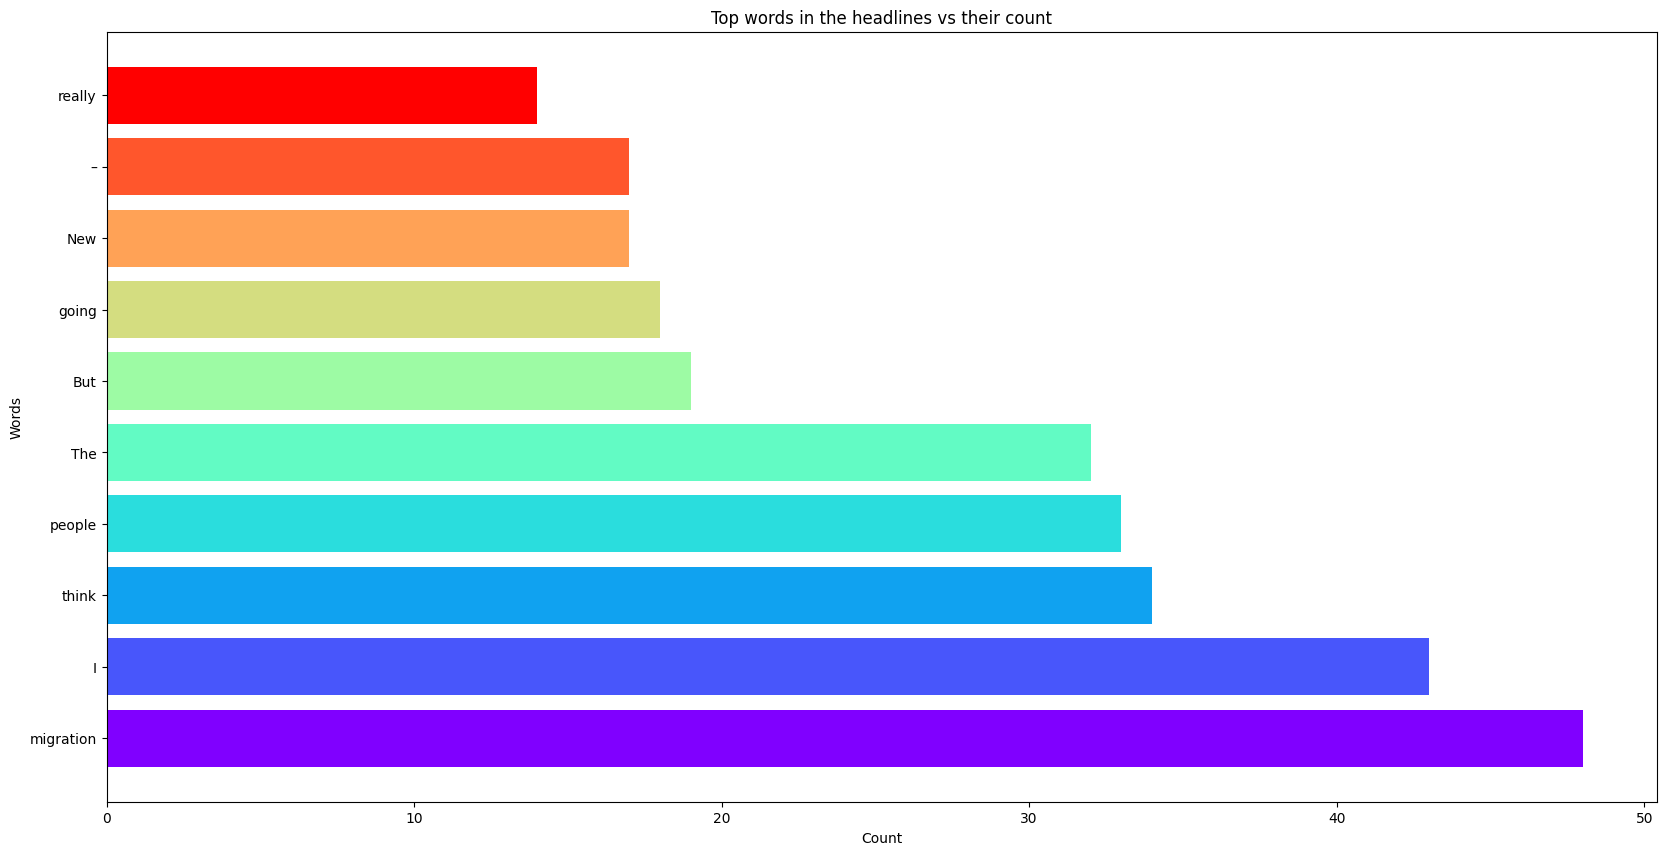

In [22]:
word_count_1(text_content)

In [23]:
from keybert import KeyBERT
kw_model = KeyBERT()
keywords = kw_model.extract_keywords(text_content)
print(keywords)

/Users/sangdo/Library/Python/3.9/lib/python/site-packages/sentence_transformers/cross_encoder/CrossEncoder.py:11: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  from tqdm.autonotebook import tqdm, trange


modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/10.7k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/612 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/350 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

1_Pooling/config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

[('asylum', 0.4446), ('migrants', 0.3955), ('migrant', 0.367), ('eu', 0.334), ('migration', 0.3115)]


In [24]:
import yake
kw_extractor = yake.KeywordExtractor()
keywords = kw_extractor.extract_keywords(text_content)
for kw in keywords:
  print(kw)

('migration', 0.002135796477966697)
('people', 0.00670654941534057)
('irregular migration', 0.00970850761063381)
('Mixed Migration Centre', 0.011642346883251265)
('Humanitarian', 0.01186603624070851)
('Mixed Migration', 0.01622346241544805)
('Frouws', 0.02166560481926658)
('year', 0.021776295533461013)
('Saudi Arabia', 0.02259784386437289)
('migrants', 0.022991523866622673)
('asylum', 0.024501287929529315)
('Migration Centre', 0.025301102377946357)
('countries', 0.028168594219354005)
('migration policies', 0.03088161246954427)
('Global South', 0.031125897308270208)
('climate', 0.03460869644660205)
('numbers', 0.03464619361594062)
('Global', 0.034874550081635744)
('Global North', 0.03490908081166468)
('border', 0.0350643759104289)


In [38]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity


def tfidf_cosine_similarity(phrase, text):
  """Calculates TF-IDF and cosine similarity between phrase and text."""
  corpus = [phrase, text]
  vectorizer = TfidfVectorizer()
  tfidf_matrix = vectorizer.fit_transform(corpus)
  cosine_sim = cosine_similarity(tfidf_matrix[0], tfidf_matrix[1])
  return cosine_sim[0][0]

# Example usage:
phrase = "forced displacement"  #0.013115167589973883
phrase = "forced migration"     #0.10329292213754805
phrase = "migration"     #0.1423316814064245
phrase = "irregular migration"     #0.11523439923766525
phrase = "forced flee"     #0.0021503268815035274
phrase = "asylum"       #0.022260015811043556
phrase = "displacement"       #0.014838018731412586
phrase = "migrant people"       #0.06048910025777504
phrase = "evacuated"       #0.0
score = tfidf_cosine_similarity(phrase, text_content)
print(score)  # Output: A value between 0 and 1

0.0


In [1]:
import numpy as np
from gensim.models import Word2Vec
#Requires: Pre-trained word embeddings (e.g., Word2Vec, GloVe, FastText).
#https://www.kaggle.com/datasets/mks2192/word2vec-model -> big file

def word_embedding_similarity(phrase, text, model):
    """Calculates word embedding similarity between phrase and text."""
    phrase_vec = np.mean([model[word] for word in phrase.split() if word in model.wv], axis=0)
    text_vec = np.mean([model[word] for word in text.split() if word in model.wv], axis=0)
    return np.dot(phrase_vec, text_vec) / (np.linalg.norm(phrase_vec) * np.linalg.norm(text_vec))

# Example usage:
# Load a pre-trained Word2Vec model
#model = Word2Vec.load("your_word2vec_model.bin")
#text = "This is a sample text about the target subject."
#phrase = "target topic"
#score = word_embedding_similarity(phrase, text, model)